In [114]:
# Import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [115]:
# Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
mpl.style.use('ggplot') # for ggplot-like style

In [116]:
# Read the data
cdata=pd.read_csv('CLV.csv')

In [117]:
cdata.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [118]:
len(cdata)

303

In [119]:
# Descriptive statistics of the dataset
cdata.describe()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


Text(0.5,0,'Income / spend')

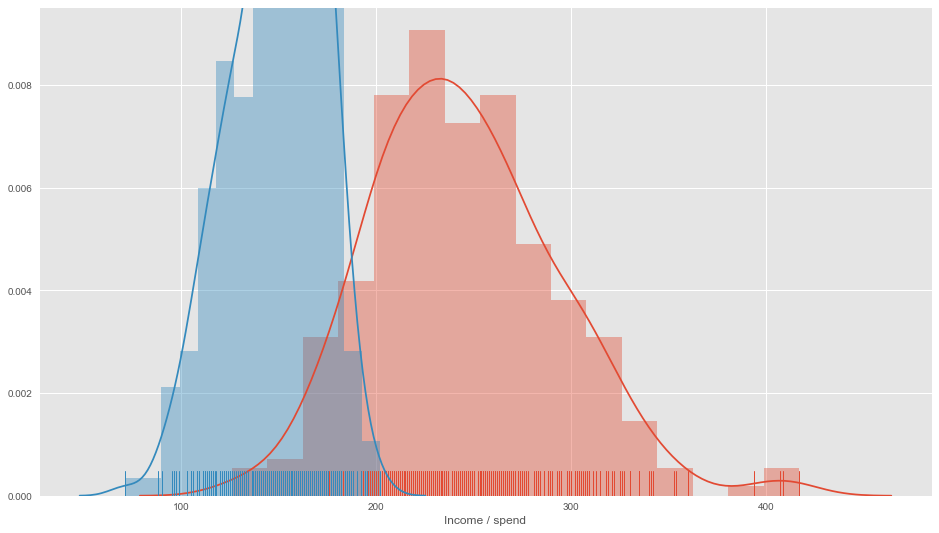

In [120]:
# Visualize data
plot_income=sns.distplot(cdata['INCOME'],kde=True, rug=True)
plot_spend=sns.distplot(cdata['SPEND'],kde=True, rug=True)
plt.xlabel('Income / spend')

/Users/yunpeng/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/yunpeng/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


[(0, 420)]

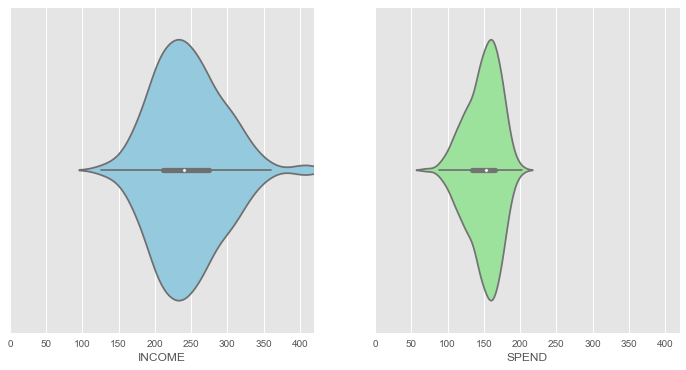

In [121]:
#Violin plot of Income and Spend
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=cdata, x='INCOME', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=cdata, x='SPEND',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

In [122]:
cdata

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [123]:
cdata.to_numpy()

array([[233, 150],
       [250, 187],
       [204, 172],
       [236, 178],
       [354, 163],
       [192, 148],
       [294, 153],
       [263, 173],
       [199, 162],
       [168, 174],
       [239, 160],
       [275, 139],
       [266, 171],
       [211, 144],
       [283, 162],
       [219, 158],
       [340, 172],
       [226, 114],
       [247, 171],
       [239, 151],
       [234, 161],
       [233, 179],
       [226, 178],
       [243, 137],
       [199, 178],
       [302, 162],
       [212, 157],
       [175, 123],
       [417, 157],
       [197, 152],
       [198, 168],
       [177, 140],
       [219, 188],
       [273, 152],
       [213, 125],
       [177, 160],
       [304, 170],
       [232, 165],
       [269, 148],
       [360, 151],
       [308, 142],
       [245, 180],
       [208, 148],
       [264, 143],
       [321, 182],
       [325, 172],
       [235, 180],
       [257, 156],
       [216, 115],
       [234, 160],
       [256, 149],
       [302, 151],
       [231,

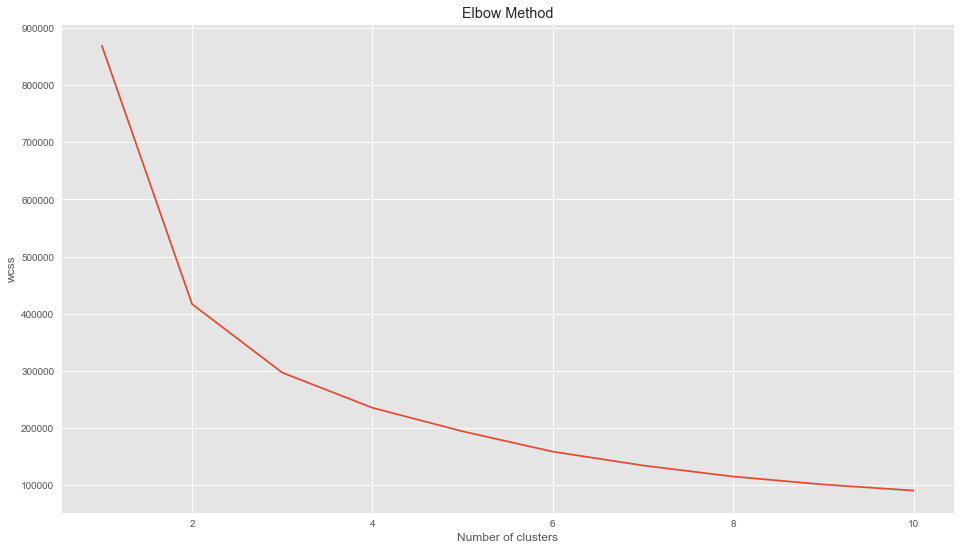

In [124]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = [] #minimizing within cluster sum of square 
X=cdata.to_numpy()
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Based on the elbow plot, we could choose 4,5 or 6 clusters. Let us try both the number of clusters and visualize the clusters to decide on the final number of clusters.

### Fitting the k-means to the dataset with k=4

In [125]:
a = np.array([[1, 2], [1, 4], [1, 0],
            [10, 2], [10, 4], [10, 0]])

In [126]:
a

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [127]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X) #fit_predict compute cluster centers and predict cluster index for each sample.
# y_means are the predicted cluster indexes. Cluster idexes are from 0-3 since there are only 4 clusters

In [128]:
y_means

array([3, 3, 2, 3, 1, 2, 1, 3, 2, 2, 3, 0, 3, 2, 3, 2, 1, 0, 3, 3, 3, 3, 3,
       0, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 1, 3, 3, 1, 1, 3, 2, 0, 1, 1,
       3, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 1, 0, 1, 2, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 1, 1, 1, 0, 3, 3, 2, 2, 0, 3, 2,
       3, 1, 2, 0, 1, 3, 1, 3, 3, 0, 2, 3, 2, 2, 0, 3, 3, 3, 1, 2, 1, 2, 3,
       2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 2, 3, 2, 0, 2, 3, 1, 3, 1, 3, 2, 2,
       2, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3,
       1, 2, 2, 2, 0, 0, 3, 3, 2, 3, 3, 1, 3, 2, 2, 3, 1, 2, 0, 1, 0, 1, 3,
       0, 1, 3, 0, 3, 2, 1, 2, 2, 0, 2, 1, 3, 3, 0, 3, 2, 0, 0, 3, 2, 3, 3,
       3, 2, 2, 3, 0, 2, 1, 3, 1, 0, 1, 0, 3, 1, 0, 3, 0, 0, 2, 0, 2, 1, 1,
       3, 0, 1, 0, 1, 1, 1, 1, 1, 3, 0, 3, 2, 0, 2, 3, 1, 0, 3, 3, 1, 3, 0,
       1, 0, 1, 0, 2, 3, 3, 3, 3, 0, 3, 2, 2, 1, 2, 0, 0, 3, 3, 0, 3, 0, 2,
       0, 0, 1, 2, 1, 2, 2, 3, 2, 1, 2, 3, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 0,
       0, 2,

In [129]:
X[y_means==3]

array([[233, 150],
       [250, 187],
       [236, 178],
       [263, 173],
       [239, 160],
       [266, 171],
       [283, 162],
       [247, 171],
       [239, 151],
       [234, 161],
       [233, 179],
       [226, 178],
       [219, 188],
       [273, 152],
       [232, 165],
       [269, 148],
       [245, 180],
       [235, 180],
       [257, 156],
       [234, 160],
       [256, 149],
       [231, 146],
       [252, 172],
       [222, 186],
       [260, 185],
       [234, 175],
       [220, 170],
       [258, 147],
       [227, 154],
       [261, 186],
       [250, 161],
       [245, 166],
       [221, 164],
       [240, 154],
       [250, 179],
       [264, 160],
       [277, 151],
       [255, 175],
       [223, 169],
       [233, 147],
       [246, 173],
       [244, 178],
       [240, 194],
       [236, 152],
       [244, 162],
       [254, 159],
       [262, 155],
       [243, 152],
       [271, 182],
       [268, 172],
       [267, 167],
       [277, 172],
       [271,

In [130]:
X[y_means==3,0]

array([233, 250, 236, 263, 239, 266, 283, 247, 239, 234, 233, 226, 219,
       273, 232, 269, 245, 235, 257, 234, 256, 231, 252, 222, 260, 234,
       220, 258, 227, 261, 250, 245, 221, 240, 250, 264, 277, 255, 223,
       233, 246, 244, 240, 236, 244, 254, 262, 243, 271, 268, 267, 277,
       271, 235, 269, 245, 242, 240, 226, 228, 227, 278, 253, 221, 240,
       268, 254, 256, 229, 224, 230, 230, 253, 233, 231, 254, 248, 274,
       255, 239, 258, 229, 249, 256, 282, 243, 282, 249, 274, 283, 254,
       247, 244, 231, 228, 230, 269, 249, 234, 234, 223, 232, 225, 236])

In [131]:
X[y_means==3,1]

array([150, 187, 178, 173, 160, 171, 162, 171, 151, 161, 179, 178, 188,
       152, 165, 148, 180, 180, 156, 160, 149, 146, 172, 186, 185, 175,
       170, 147, 154, 186, 161, 166, 164, 154, 179, 160, 151, 175, 169,
       147, 173, 178, 194, 152, 162, 159, 155, 152, 182, 172, 167, 172,
       162, 153, 163, 143, 149, 171, 169, 138, 155, 152, 179, 163, 169,
       160, 147, 142, 168, 173, 160, 165, 144, 163, 147, 163, 158, 150,
       161, 142, 157, 150, 144, 150, 174, 152, 156, 143, 166, 195, 146,
       143, 154, 182, 165, 160, 169, 144, 145, 156, 181, 164, 146, 174])

In [132]:
km4.cluster_centers_

array([[ 259.76086957,  118.58695652],
       [ 319.53571429,  151.73214286],
       [ 194.19587629,  149.50515464],
       [ 246.51923077,  162.39423077]])

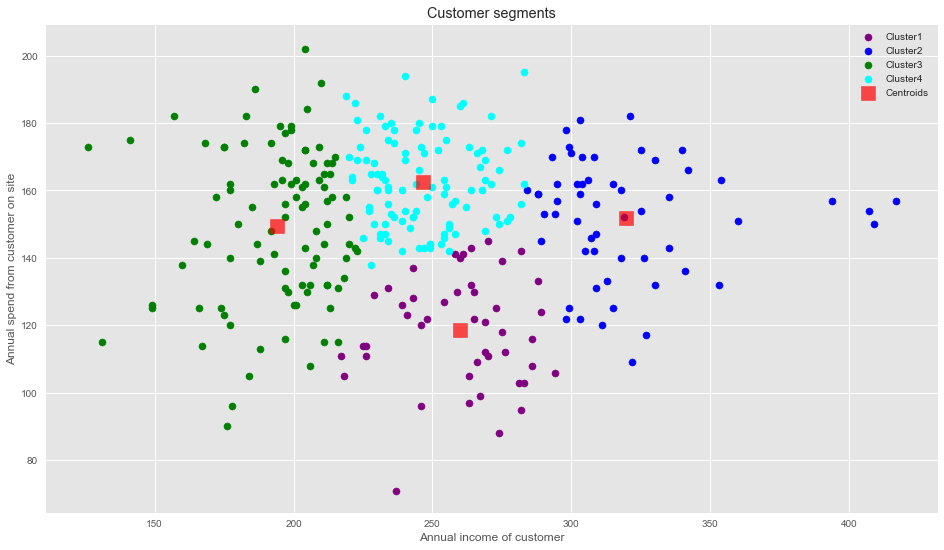

In [133]:
#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1') #s : scalar or array_like, shape (n, ),means the size of each scatter
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
#X[y_means==3,0] returns the x axis (income) value when y_means==3;
#X[y_means==3,1] returns the y axis (spend) value when y_means==3;

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
#plt.scatter(km4.cluster_centers_[:,0] returns the first column and all rows
#km4.cluster_centers_[1,:] returns the values of the first row and all columns

plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

The plot shows the distribution of the 4 clusters. We could interpret them as the following customer segments:

Cluster 1: Customers with medium annual income and low annual spend

Cluster 2: Customers with high annual income and medium to high annual spend

Cluster 3: Customers with low annual income

Cluster 4: Customers with medium annual income but high annual spend